In [1]:
from sklearn import datasets
from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Base Digits

Features: (1797, 64)


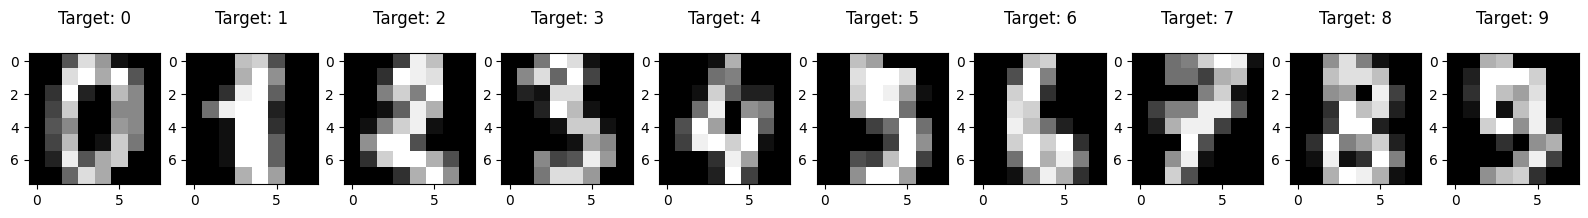

In [2]:
digits = datasets.load_digits()

X = digits.data
Y = digits.target

matriz_acc = [[0] * 8 for _ in range(11)]

print("Features:", digits.data.shape)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:10], Y[0:10])):
    plt.subplot(1, 10, index +1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.grey)
    plt.title('Target: {}\n'.format(label, fontsize = 20))

## Funções

In [3]:
def funcao_perceptron(X_reduzido, Y):
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_reduzido, Y, test_size=0.5, random_state=5)

    clf = Perceptron(random_state=1000, tol=1e-3) 
    clf.fit(X_treino, Y_treino)

    return clf.score(X_teste, Y_teste)

In [4]:
def funcao_reg_log(X_reduzido, Y):
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_reduzido, Y, test_size=0.5, random_state=5)

    clf = LogisticRegression(max_iter=5000, random_state=1000, tol=1e-3) 
    clf.fit(X_treino, Y_treino)

    return clf.score(X_teste, Y_teste)

In [5]:
def funcao_MLP(X_reduzido, Y):
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_reduzido, Y, test_size=0.5, random_state=5)

    clf = MLPClassifier(max_iter=1000, random_state=1000, tol=1e-3) 
    clf.fit(X_treino, Y_treino)

    return clf.score(X_teste, Y_teste)

In [6]:
def funcao_KNN(X_reduzido, Y):
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_reduzido, Y, test_size=0.5, random_state=5)

    clf = KNeighborsClassifier(n_neighbors=7)
    clf.fit(X_treino, Y_treino)

    return clf.score(X_teste, Y_teste)

In [7]:
def funcao_NC(X_reduzido, Y):
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_reduzido, Y, test_size=0.5, random_state=5)

    clf = NearestCentroid()
    clf.fit(X_treino, Y_treino)

    return clf.score(X_teste, Y_teste)

In [8]:
def funcao_BSHG(X_reduzido, Y):
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_reduzido, Y, test_size=0.5, random_state=5)

    clf = GaussianNB()
    clf.fit(X_treino, Y_treino)  

    return clf.score(X_teste, Y_teste)

In [9]:
def funcao_SVM_linear(X_reduzido, Y):
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_reduzido, Y, test_size=0.5, random_state=5)

    clf = SVC(kernel='linear')
    clf.fit(X_treino, Y_treino)

    return clf.score(X_teste, Y_teste)

In [10]:
def funcao_SVM_RBF(X_reduzido, Y):
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_reduzido, Y, test_size=0.5, random_state=5)

    clf = SVC(kernel='rbf')
    clf.fit(X_treino, Y_treino)

    return clf.score(X_teste, Y_teste)

In [11]:
def funcao_KMeans(X_reduzido):
    
    clf = KMeans(n_clusters=10, random_state=1000, n_init='auto', init='k-means++')
    clf.fit(X_reduzido)

    return silhouette_score(X_reduzido, clf.labels_)

In [12]:
def funcao_GMM(X_reduzido):
    
    clf = GaussianMixture(n_components=10, random_state=1000, max_iter=1000, init_params='kmeans')
    clf.fit(X_reduzido)

    previsoes = clf.predict(X_reduzido)
    return silhouette_score(X_reduzido, previsoes)

In [13]:
funcoes = {
    0: funcao_perceptron,
    1: funcao_reg_log,
    2: funcao_MLP,
    3: funcao_KNN,
    4: funcao_NC,
    5: funcao_BSHG,
    6: funcao_SVM_linear,
    7: funcao_SVM_RBF,
    8: funcao_KMeans,
    9: funcao_GMM,
}

## PCA

In [14]:
dados_PCA = PCA(n_components=20, random_state=1000)
X_reduzido = dados_PCA.fit_transform(X)

print(dados_PCA.explained_variance_ratio_)

for i in range (0, 10):
    if i < 8:
        resultados = [funcoes[i](X_reduzido, Y) for _ in range(20)]
        matriz_acc[i][0] = np.mean(resultados)
    else:
        resultados = [funcoes[i](X_reduzido) for _ in range(20)]
        matriz_acc[i][0] = np.mean(resultados)

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272696
 0.01821862 0.01773855 0.01467098 0.01409712 0.01318567 0.0124808
 0.0101742  0.00904484]


## LDA

In [15]:
dados_LDA = LinearDiscriminantAnalysis(n_components=9)
X_reduzido = dados_LDA.fit_transform(X, Y)

print(dados_LDA.explained_variance_ratio_)

for i in range (0, 10):
    if i < 8:
        resultados = [funcoes[i](X_reduzido, Y) for _ in range(20)]
        matriz_acc[i][1] = np.mean(resultados)
    else:
        resultados = [funcoes[i](X_reduzido) for _ in range(20)]
        matriz_acc[i][1] = np.mean(resultados)

[0.28912041 0.18262788 0.16962345 0.1167055  0.08301253 0.06565685
 0.04310127 0.0293257  0.0208264 ]


##  KPCA

In [16]:
dados_KPCA = KernelPCA(n_components=20, kernel='linear')
X_reduzido = dados_KPCA.fit_transform(X)
explained_variance_ratio = np.var(X_reduzido, axis=0) / np.var(X, axis=0).sum()

print(explained_variance_ratio)

for i in range (0, 10):
    if i < 8:
        resultados = [funcoes[i](X_reduzido, Y) for _ in range(20)]
        matriz_acc[i][2] = np.mean(resultados)
    else:
        resultados = [funcoes[i](X_reduzido) for _ in range(20)]
        matriz_acc[i][2] = np.mean(resultados)
        

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617]


## ISOMAP

In [17]:
dados_ISOMAP = Isomap(n_components=20, n_neighbors=9, eigen_solver='auto')
X_reduzido = dados_ISOMAP.fit_transform(X)

dist_original = pairwise_distances(X, metric='euclidean')
dist_reduzida = pairwise_distances(X_reduzido, metric='euclidean')
erro_relativo = np.abs(dist_original - dist_reduzida).sum() / dist_original.sum()

print("Erro Relativo de Preservação de Distâncias:", erro_relativo)

for i in range (0, 10):
    if i < 8:
        resultados = [funcoes[i](X_reduzido, Y) for _ in range(20)]
        matriz_acc[i][3] = np.mean(resultados)
    else:
        resultados = [funcoes[i](X_reduzido) for _ in range(20)]
        matriz_acc[i][3] = np.mean(resultados)

Erro Relativo de Preservação de Distâncias: 2.465789735142823


## LLE

In [18]:
dados_LLE = LocallyLinearEmbedding(n_components=20, n_neighbors=9, max_iter=1000)
X_reduzido = dados_LLE.fit_transform(X)



for i in range (0, 10):
    if i < 8:
        resultados = [funcoes[i](X_reduzido, Y) for _ in range(20)]
        matriz_acc[i][4] = np.mean(resultados)
    else:
        resultados = [funcoes[i](X_reduzido) for _ in range(20)]
        matriz_acc[i][4] = np.mean(resultados)

## Laplacian Eigenmaps

In [19]:
dados_lap_eig = SpectralEmbedding(n_components=20, random_state=1000)
X_reduzido = dados_lap_eig.fit_transform(X)
explained_variance_ratio = np.var(X_reduzido, axis=0) / np.var(X, axis=0).sum()

print(X_reduzido.shape)
print(explained_variance_ratio)

for i in range (0, 10):
    if i < 8:
        resultados = [funcoes[i](X_reduzido, Y) for _ in range(20)]
        matriz_acc[i][5] = np.mean(resultados)
    else:
        resultados = [funcoes[i](X_reduzido) for _ in range(20)]
        matriz_acc[i][5] = np.mean(resultados)

(1797, 20)
[2.52701409e-09 2.53056420e-09 2.60467297e-09 2.68244403e-09
 2.75263931e-09 2.77227297e-09 2.70999795e-09 3.01719719e-09
 2.58417737e-09 2.61967552e-09 2.86021230e-09 2.94877735e-09
 2.95267072e-09 2.93277881e-09 2.82300833e-09 2.95369039e-09
 2.76338788e-09 2.90021445e-09 2.88524921e-09 2.88137737e-09]


## t-SNE

In [20]:
dados_tsne = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=10, method = 'barnes_hut')
X_reduzido = dados_tsne.fit_transform(X)

print("Shape do dataset reduzido:", X_reduzido.shape)
print(dados_PCA.explained_variance_ratio_)

for i in range (0, 10):
    if i < 8:
        resultados = [funcoes[i](X_reduzido, Y) for _ in range(20)]
        matriz_acc[i][6] = np.mean(resultados)
    else:
        resultados = [funcoes[i](X_reduzido) for _ in range(20)]
        matriz_acc[i][6] = np.mean(resultados)

Shape do dataset reduzido: (1797, 3)
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272696
 0.01821862 0.01773855 0.01467098 0.01409712 0.01318567 0.0124808
 0.0101742  0.00904484]


## Raw Data

In [21]:
for i in range (0, 10):
    if i < 8:
        resultados = [funcoes[i](X, Y) for _ in range(20)]
        matriz_acc[i][7] = np.mean(resultados)
    else:
        resultados = [funcoes[i](X) for _ in range(20)]
        matriz_acc[i][7] = np.mean(resultados)

## Tabela de Acurácias

In [22]:
nomes_colunas = ["PCA", "LDA", "KPCA", "ISOMAP", "LLE", "Lap. Eig.", "t-SNE", "Raw data"]
nomes_linhas = ["Perceptron", "Reg. Logística", "MLP", "KNN", "Nearest Mean", "Bayesiano", "SVM (linear)", "SVM (rbf)", "K-médias", "GMM", "Média"]

df = pd.DataFrame(matriz_acc[:11], columns=nomes_colunas, index=nomes_linhas)

df.loc["Média"] = df.mean()

pd.set_option('display.precision', 3)
print(df)

                  PCA    LDA   KPCA  ISOMAP    LLE  Lap. Eig.  t-SNE  Raw data
Perceptron      0.872  0.952  0.823   0.814  0.835      0.690  0.469     0.938
Reg. Logística  0.943  0.953  0.940   0.964  0.932      0.089  0.940     0.952
MLP             0.960  0.964  0.959   0.976  0.963      0.089  0.978     0.958
KNN             0.973  0.969  0.973   0.983  0.967      0.960  0.989     0.978
Nearest Mean    0.908  0.963  0.908   0.954  0.956      0.927  0.942     0.907
Bayesiano       0.934  0.960  0.935   0.957  0.967      0.921  0.960     0.858
SVM (linear)    0.969  0.959  0.968   0.980  0.367      0.089  0.958     0.974
SVM (rbf)       0.988  0.966  0.988   0.987  0.973      0.967  0.989     0.981
K-médias        0.214  0.396  0.214   0.337  0.339      0.183  0.487     0.182
GMM             0.208  0.390  0.208   0.335  0.358      0.186  0.487     0.178
Média           0.724  0.770  0.720   0.753  0.696      0.464  0.745     0.719


## Conclusão

Redução 2D com LDA

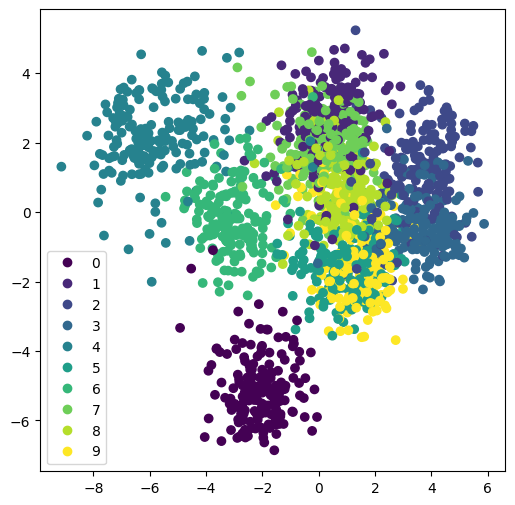

In [23]:
x_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X,Y)

plt.figure(figsize=(6,6))
sc = plt.scatter(x_lda [:, 0], x_lda [:, 1], c=Y)
plt.legend(handles = sc.legend_elements()[0], labels=list(range(10)))
plt.show()

Redução 2D com ISOMAP

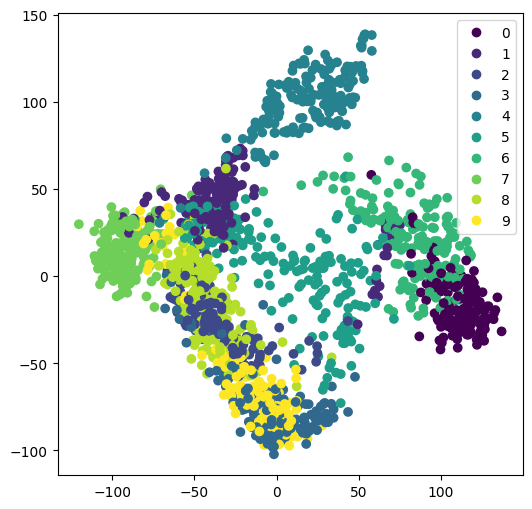

In [24]:
x_isomap = Isomap(n_components=2, n_neighbors=9, eigen_solver='auto').fit_transform(X)

plt.figure(figsize=(6,6))
sc = plt.scatter(x_isomap [:, 0], x_isomap [:, 1], c=Y)
plt.legend(handles = sc.legend_elements()[0], labels=list(range(10)))
plt.show()

Redução 2D com t-SNE

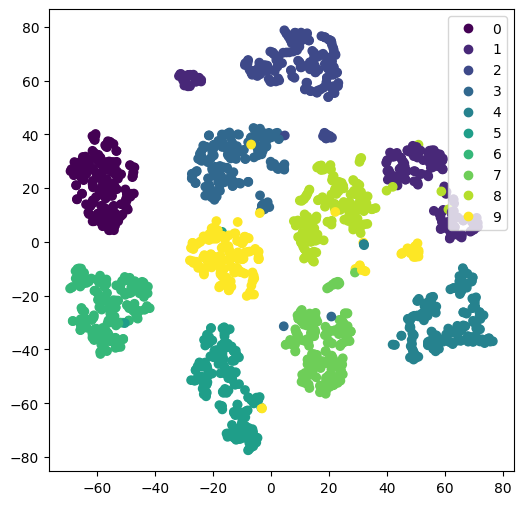

In [25]:
x_tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X)

plt.figure(figsize=(6,6))
sc = plt.scatter(x_tsne [:, 0], x_tsne [:, 1], c=Y)
plt.legend(handles = sc.legend_elements()[0], labels=list(range(10)))
plt.show()